In [ ]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [ ]:
# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1

# print goes to sys.stdout
print(count)

In [ ]:
#Windows OS
#type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

In [ ]:
#LInux OS
#cat SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

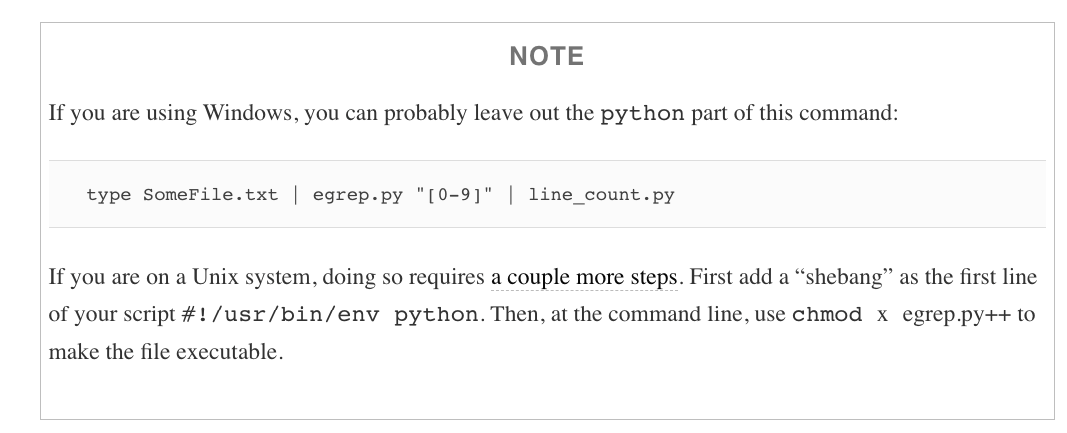

In [ ]:
# most_common_words.py
import sys
from collections import Counter

# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)   # nonzero exit code indicates error

counter = Counter(word.lower()                      # lowercase words
                  for line in sys.stdin
                  for word in line.strip().split()  # split on spaces
                  if word)                          # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

## The Basics of Text Files

In [ ]:
# 'r' means read-only, it's assumed if you leave it out
file_for_reading = open('reading_file.txt', 'r')
file_for_reading2 = open('reading_file.txt')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

In [ ]:
with open(filename) as f:
    data = function_that_gets_data_from(f)

# at this point f has already been closed, so don't try to use it
process(data)

In [ ]:
starts_with_hash = 0

with open('input.txt') as f:
    for line in f:                  # look at each line in the file
        if re.match("^#",line):     # use a regex to see if it starts with '#'
            starts_with_hash += 1   # if it does, add 1 to the count

In [ ]:
def get_domain(email_address: str) -> str:
    """Split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'

from collections import Counter

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

In [ ]:
import csv

with open('tab_delimited_stock_prices.txt') as f:
    tab_reader = csv.reader(f, delimiter='\t')
    for row in tab_reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

In [ ]:
with open('colon_delimited_stock_prices.txt') as f:
    colon_reader = csv.DictReader(f, delimiter=':')
    for dict_row in colon_reader:
        date = dict_row["date"]
        symbol = dict_row["symbol"]
        closing_price = float(dict_row["closing_price"])
        process(date, symbol, closing_price)

In [ ]:
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5 }

with open('comma_delimited_stock_prices.txt', 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')
    for stock, price in todays_prices.items():
        csv_writer.writerow([stock, price])

In [ ]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]


In [ ]:
# don't do this!
#with open('bad_csv.txt', 'w') as f:
#    for row in results:
#        f.write(",".join(map(str, row))) # might have too many commas in it!
#        f.write("\n")                    # row might have newlines as well!

## Scrape

In [ ]:
from bs4 import BeautifulSoup
import requests

# I put the relevant HTML file on GitHub. In order to fit
# the URL in the book I had to split it across two lines.
# Recall that whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
       "joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

In [ ]:
first_paragraph = soup.find('p')        # or just soup.p

In [ ]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

In [ ]:
first_paragraph_id = soup.p['id']       # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id')  # returns None if no 'id'

In [ ]:
all_paragraphs = soup.find_all('p')  # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

In [ ]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]

In [ ]:
# Warning: will return the same <span> multiple times
# if it sits inside multiple <div>s.
# Be more clever if that's the case.
spans_inside_divs = [span
                     for div in soup('div')     # for each <div> on the page
                     for span in div('span')]   # find each <span> inside it

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")

all_urls = [a['href']
            for a in soup('a')
            if a.has_attr('href')]

print(len(all_urls))  # 965 for me, way too many

In [ ]:
import re

# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
regex = r"^https?://.*\.house\.gov/?$"

# Let's write some tests!
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")

# And now apply
good_urls = [url for url in all_urls if re.match(regex, url)]

print(len(good_urls))  # still 862 for me

In [ ]:
good_urls = list(set(good_urls))

print(len(good_urls))  # only 431 for me

In [ ]:
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')

# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}

print(links) # {'/media/press-releases'}

In [ ]:
from typing import Dict, Set

press_releases: Dict[str, Set[str]] = {}

for house_url in good_urls:
    html = requests.get(house_url).text
    soup = BeautifulSoup(html, 'html5lib')
    pr_links = {a['href'] for a in soup('a') if 'press releases'
                                             in a.text.lower()}
    print(f"{house_url}: {pr_links}")
    press_releases[house_url] = pr_links

In [ ]:
def paragraph_mentions(text: str, keyword: str) -> bool:
    """
    Returns True if a <p> inside the text mentions {keyword}
    """
    soup = BeautifulSoup(text, 'html5lib')
    paragraphs = [p.get_text() for p in soup('p')]

    return any(keyword.lower() in paragraph.lower()
               for paragraph in paragraphs)

In [ ]:
text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter")       # is inside a <p>
assert not paragraph_mentions(text, "facebook")  # not inside a <p>

In [ ]:
for house_url, pr_links in press_releases.items():
    for pr_link in pr_links:
        url = f"{house_url}/{pr_link}"
        text = requests.get(url).text

        if paragraph_mentions(text, 'data'):
            print(f"{house_url}")
            break  # done with this house_url

## Using APIs

In [ ]:
import json
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2019,
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
assert deserialized["publicationYear"] == 2019
assert "data science" in deserialized["topics"]

In [ ]:
import requests, json

github_user = "joelgrus"
endpoint = f"https://api.github.com/users/{github_user}/repos"

repos = json.loads(requests.get(endpoint).text)

In [ ]:
from collections import Counter
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [ ]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["pushed_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

## USING TWYTHON

In [ ]:
import os

# Feel free to plug your key and secret in directly
CONSUMER_KEY = os.environ.get("TWITTER_CONSUMER_KEY")
CONSUMER_SECRET = os.environ.get("TWITTER_CONSUMER_SECRET")

In [ ]:
import webbrowser
from twython import Twython

# Get a temporary client to retrieve an authentication URL
temp_client = Twython(CONSUMER_KEY, CONSUMER_SECRET)
temp_creds = temp_client.get_authentication_tokens()
url = temp_creds['auth_url']

# Now visit that URL to authorize the application and get a PIN
print(f"go visit {url} and get the PIN code and paste it below")
webbrowser.open(url)
PIN_CODE = input("please enter the PIN code: ")

# Now we use that PIN_CODE to get the actual tokens
auth_client = Twython(CONSUMER_KEY,
                      CONSUMER_SECRET,
                      temp_creds['oauth_token'],
                      temp_creds['oauth_token_secret'])
final_step = auth_client.get_authorized_tokens(PIN_CODE)
ACCESS_TOKEN = final_step['oauth_token']
ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

# And get a new Twython instance using them.
twitter = Twython(CONSUMER_KEY,
                  CONSUMER_SECRET,
                  ACCESS_TOKEN,
                  ACCESS_TOKEN_SECRET)

In [ ]:
# Search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    print(f"{user}: {text}\n")

In [ ]:
from twython import TwythonStreamer

# Appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    def on_success(self, data):
        """
        What do we do when Twitter sends us data?
        Here data will be a Python dict representing a tweet.
        """
        # We only want to collect English-language tweets
        if data.get('lang') == 'en':
            tweets.append(data)
            print(f"received tweet #{len(tweets)}")

        # Stop when we've collected enough
        if len(tweets) >= 100:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

In [ ]:
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

In [ ]:
top_hashtags = Counter(hashtag['text'].lower()
                       for tweet in tweets
                       for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

- https://www.kaggle.com/datasets
- https://scrapy.org/